### Precision和Recall之间是否能够平衡

以逻辑回归为例，修改它的决策边界，相当于平移决策边界来影响决策结果：
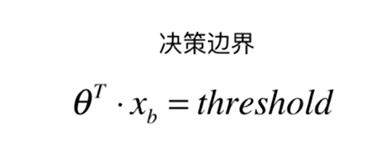
下图中⭐表示预值为1，○表示预值为0：
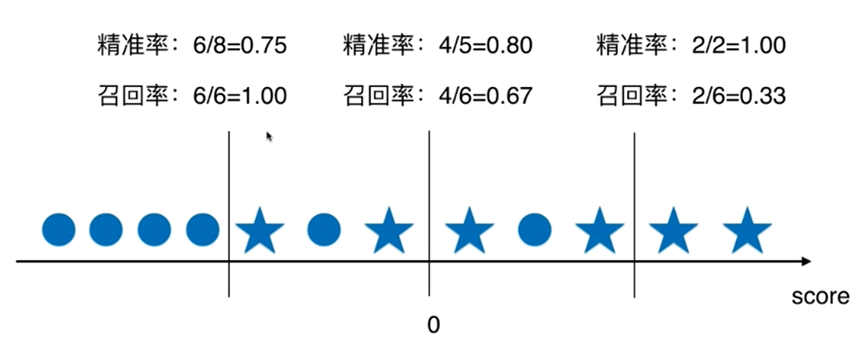
可以发现精准率和召回率两者是成反比的，相互制约的，不能同时提高

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

E:\Application\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [7]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.9473684210526315

In [8]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [9]:
log_reg.decision_function(X_test)[:10] # 得到score的值，默认决策边界的threshold

array([-21.45600241, -32.94974484, -16.40358049, -79.91453954,
       -48.16618205, -24.21675714, -44.76256848, -24.22873941,
        -1.22419553, -19.07705062])

In [10]:
log_reg.predict(X_test)[:10] # score>0,返回1，≤0，返回0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
decision_scores = log_reg.decision_function(X_test)

In [12]:
np.min(decision_scores)

-85.76642438512

In [13]:
np.max(decision_scores)

19.975142566998983

In [14]:
# 设置决策边界threshold=5
y_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [15]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [16]:
precision_score(y_test, y_predict_2)

0.96

In [17]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [18]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [19]:
confusion_matrix(y_test, y_predict_3)

array([[389,  16],
       [  5,  40]], dtype=int64)

In [20]:
precision_score(y_test, y_predict_3)

0.7142857142857143

In [21]:
recall_score(y_test, y_predict_3)

0.8888888888888888